# preprocessing
- 데이터 분석이나 모델링을 하기 전에 전처리하는 방법 학습

In [1]:

%ls datas

__pycache__/       preprocessing.csv  train.csv
makedata.py        seoul.csv


In [2]:
df = pd.read_csv("datas/preprocessing.csv")
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [3]:
# 결측데이터 검색방법 : isnull, isna 함수 적용 
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False


In [4]:
df.isna()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False


In [6]:
df.isnull().sum() #컬럼별 결측데이터가 몇개인지 알 수있다

x1    2
x2    3
x3    2
x4    1
x5    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      4 non-null      float64
 2   x3      5 non-null      float64
 3   x4      6 non-null      object 
 4   x5      7 non-null      object 
dtypes: float64(3), object(2)
memory usage: 408.0+ bytes


In [8]:
#missingno 패키지사용

In [9]:
!pip install missingno

In [10]:
import missingno as msno

In [12]:
%matplotlib inline
%config inlineBackend.figure_formats = {'png','retina'} #png로 설정하면 그려지는 그래프가 png가 됨.// retina는 해상도를 높혀줌

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

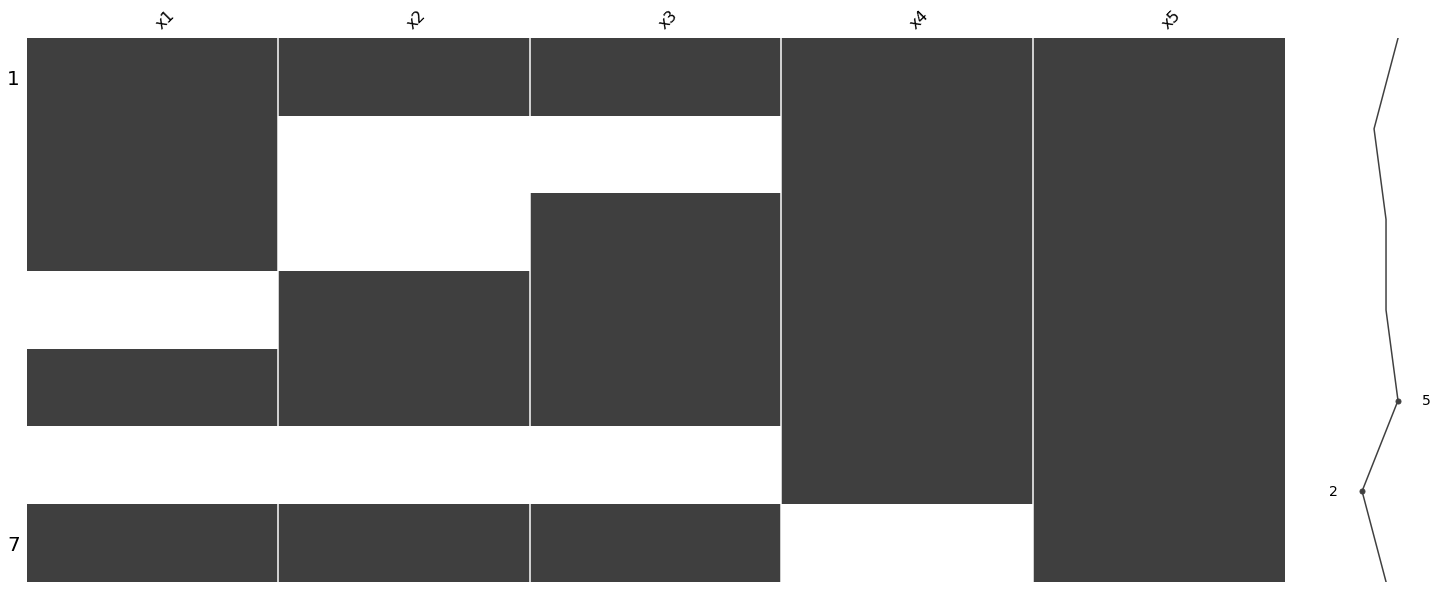

In [16]:
msno.matrix(df)
plt.show()
#흰 부분이 결측치
# 맨 마지막 은 스파크라인 // 각 로우별로 데이터가 몇개있는지 알려줌

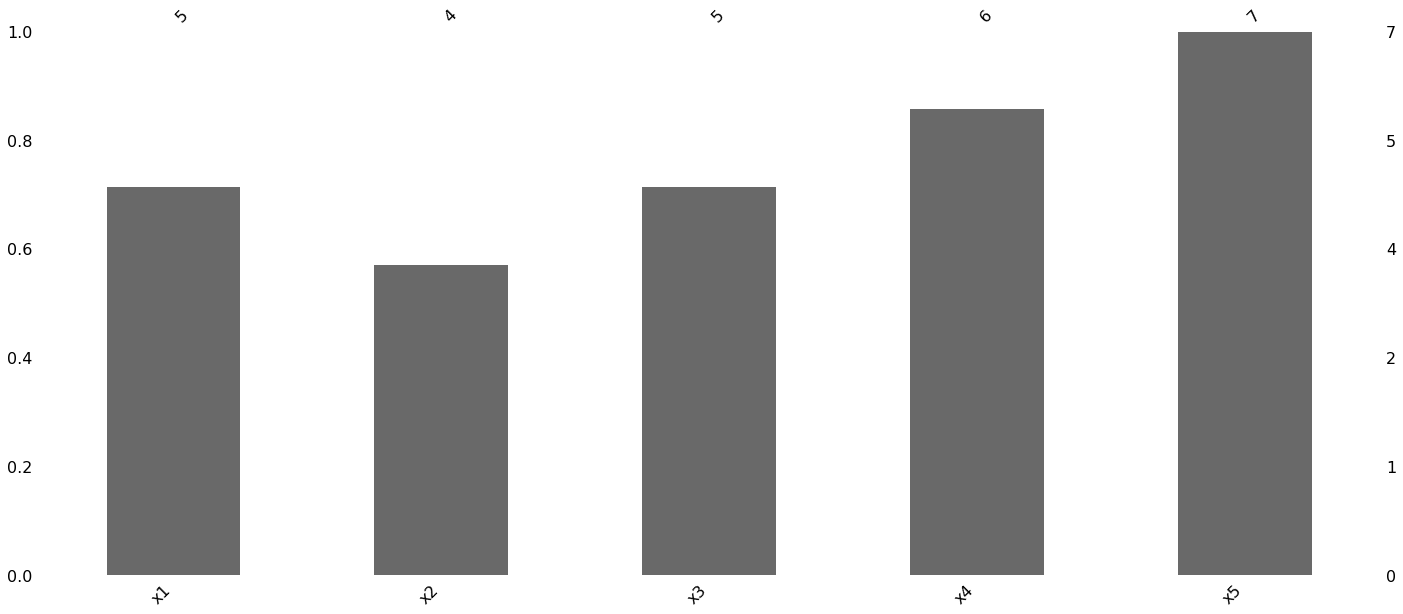

In [17]:
msno.bar(df)
plt.show()

In [18]:
# 2. 타이타닉 승객 데이터 결측치 전처리

In [19]:
import seaborn as sns

In [21]:
titanic_df = sns.load_dataset("titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

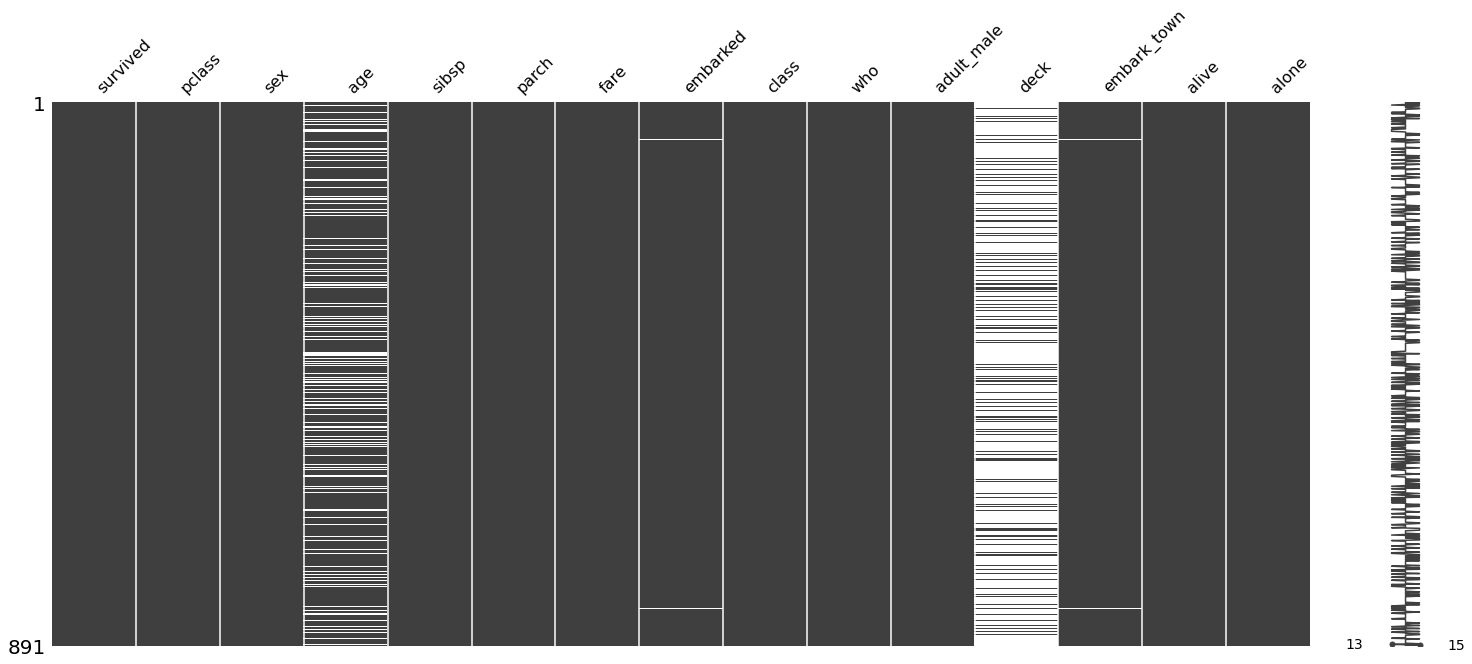

In [22]:
msno.matrix(titanic_df)

In [24]:
# 결측 데이터의 처리 1: 삭제 

In [26]:

df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [27]:
# 결측 데이터가 있는 row를 삭제
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B


In [28]:
# 결측 데이터가 있는 column을 삭제
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,A
6,A


In [29]:
# 갯수를 설정해서 삭제
df.notnull().sum()

x1    5
x2    4
x3    5
x4    6
x5    7
dtype: int64

In [32]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [31]:
# 컬럼 데이터가 5개 이상인 데이터만 남기기
df.dropna(thresh=5, axis=1)


,x1,x3,x4,x5
0,1.0,1.0,2019-01-01,A
1,2.0,NaN,2019-01-02,B
2,3.0,3.0,2019-01-03,C
3,NaN,4.0,2019-01-04,A
4,5.0,5.0,2019-01-05,B
5,NaN,NaN,2019-01-06,A
6,7.0,7.0,NaN,A


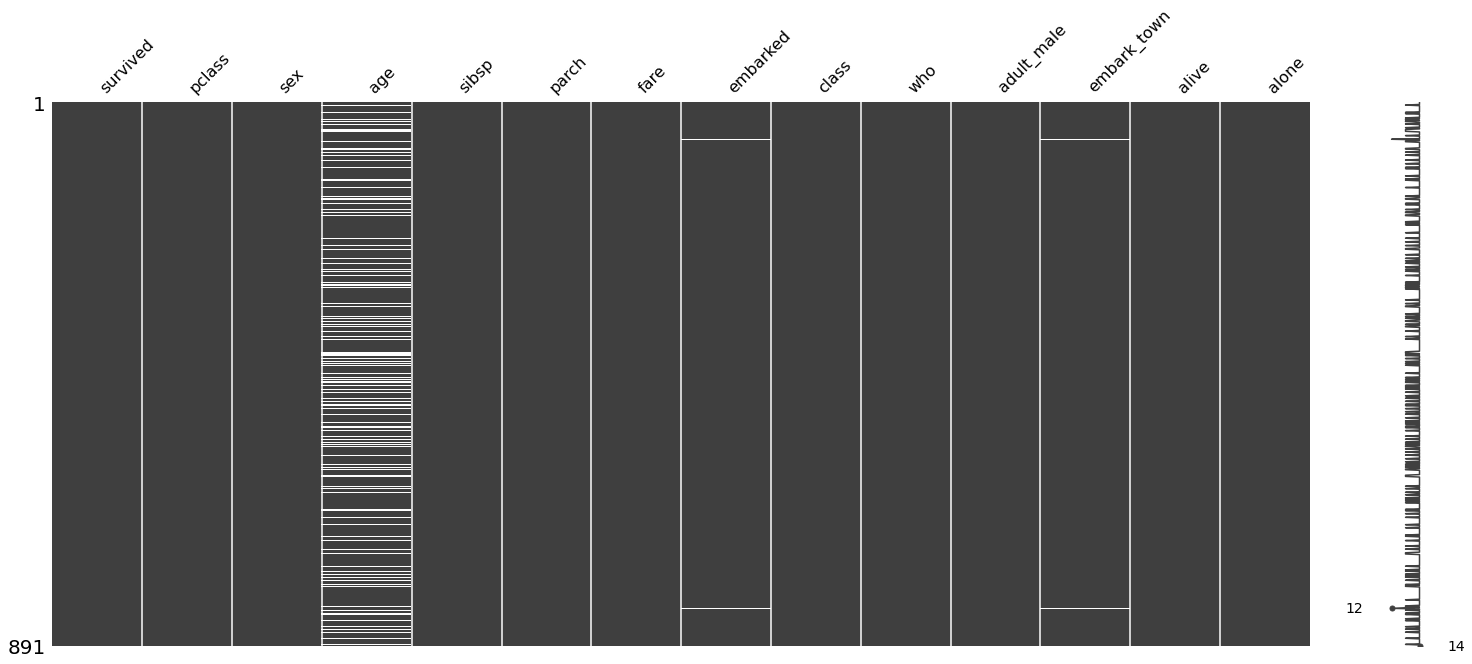

In [38]:
# 데이터가 20% 이상이 없으면 컬럼 삭제
result_df = titanic_df.dropna(thresh=int(len(titanic_df) *0.8), axis=1)
msno.matrix(result_df)
plt.show()

In [39]:
result_df.info()
# age는 714개라서 사라지지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [40]:
# 결측데이터의 처리 2: 대치
# 수치형 : 비 결측데이터의  평균, 중앙값으로 대체할 수 있고 -1,0,1 로도 대체 가능하다
# 범주형 : 최빈값으로 대체

In [41]:
# 최빈값으로 채우기
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy="most_frequent")

In [43]:
imputer.fit_transform(df)

array([[1.0, 0.1, 1.0, '2019-01-01', 'A'],
       [2.0, 0.1, 1.0, '2019-01-02', 'B'],
       [3.0, 0.1, 3.0, '2019-01-03', 'C'],
       [1.0, 0.4, 4.0, '2019-01-04', 'A'],
       [5.0, 0.5, 5.0, '2019-01-05', 'B'],
       [1.0, 0.1, 1.0, '2019-01-06', 'A'],
       [7.0, 0.7, 7.0, '2019-01-01', 'A']], dtype=object)

In [45]:
pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,A
6,7,0.7,7,2019-01-01,A


In [44]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [47]:
#타이타닉데이터 최빈값 채우기
result_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


/Users/song-kang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

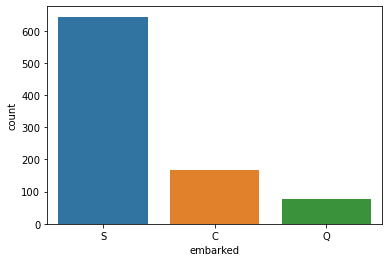

In [48]:
sns.countplot(result_df.embarked)

In [49]:
imputer = SimpleImputer(strategy="most_frequent")

In [52]:
result_df["embarked"] = imputer.fit_transform(result_df[["embarked"]])
result_df["embark_town"] = imputer.fit_transform(result_df[["embark_town"]])

<ipython-input-52-7be3ee9fe64d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["embarked"] = imputer.fit_transform(result_df[["embarked"]])
<ipython-input-52-7be3ee9fe64d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["embark_town"] = imputer.fit_transform(result_df[["embark_town"]])


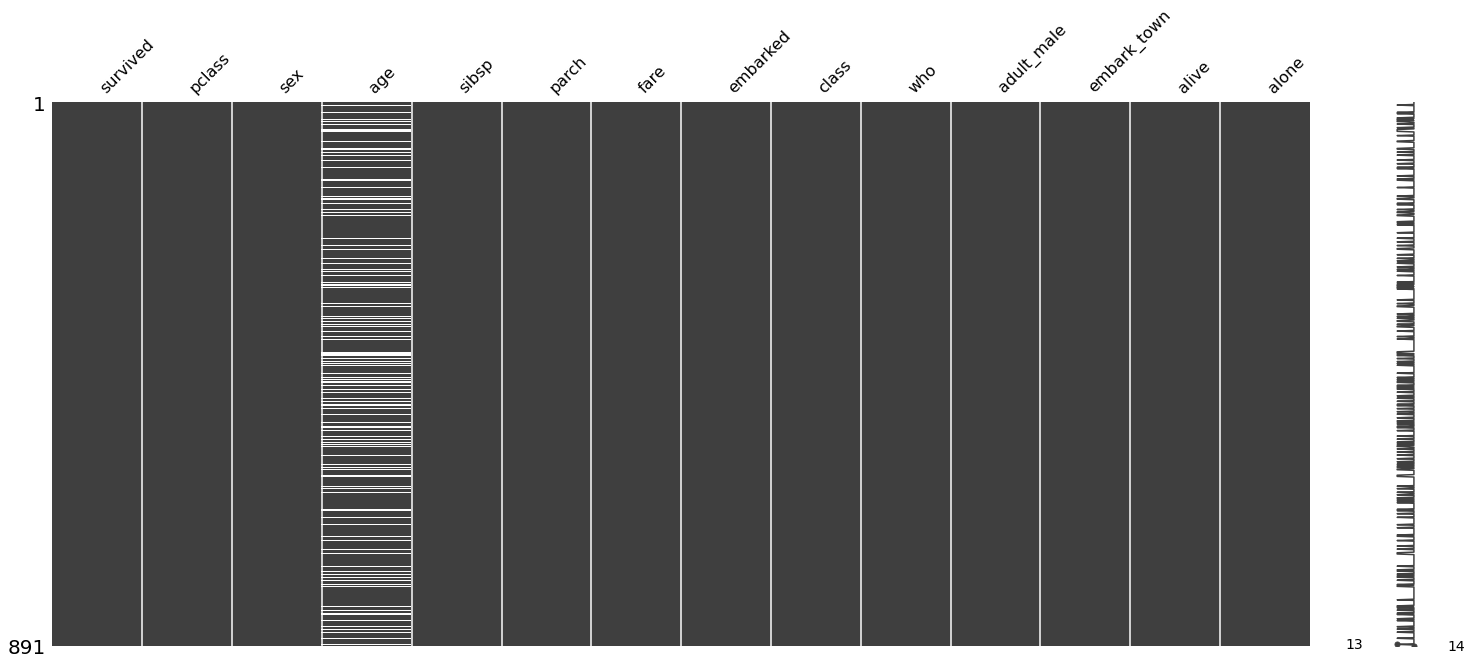

In [53]:
msno.matrix(result_df)
plt.show()

In [55]:
# 수치형 데이터 채우기
# 평균, 중앙값으로 채울 수 있음.
# 평균 : 보통, 정규분포가 대칭으로 나오면 사용하고
# 중앙값 : 정규분포가 비대칭으로 나오면 중앙값 사용

/Users/song-kang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


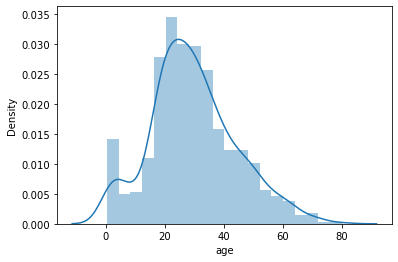

In [57]:
sns.distplot(result_df.age)
plt.show()

In [58]:
# age 컬럼의 결측 데이터를 중앙값으로 채우기

In [59]:
imputer = SimpleImputer(strategy="median")

In [65]:
np.median(result_df['age'].dropna())

28.0

In [60]:
imputer.fit_transform(result_df[['age']])

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [67]:
result_df["age"] = imputer.fit_transform(result_df[['age']])

<ipython-input-67-5185f37ee672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["age"] = imputer.fit_transform(result_df[['age']])


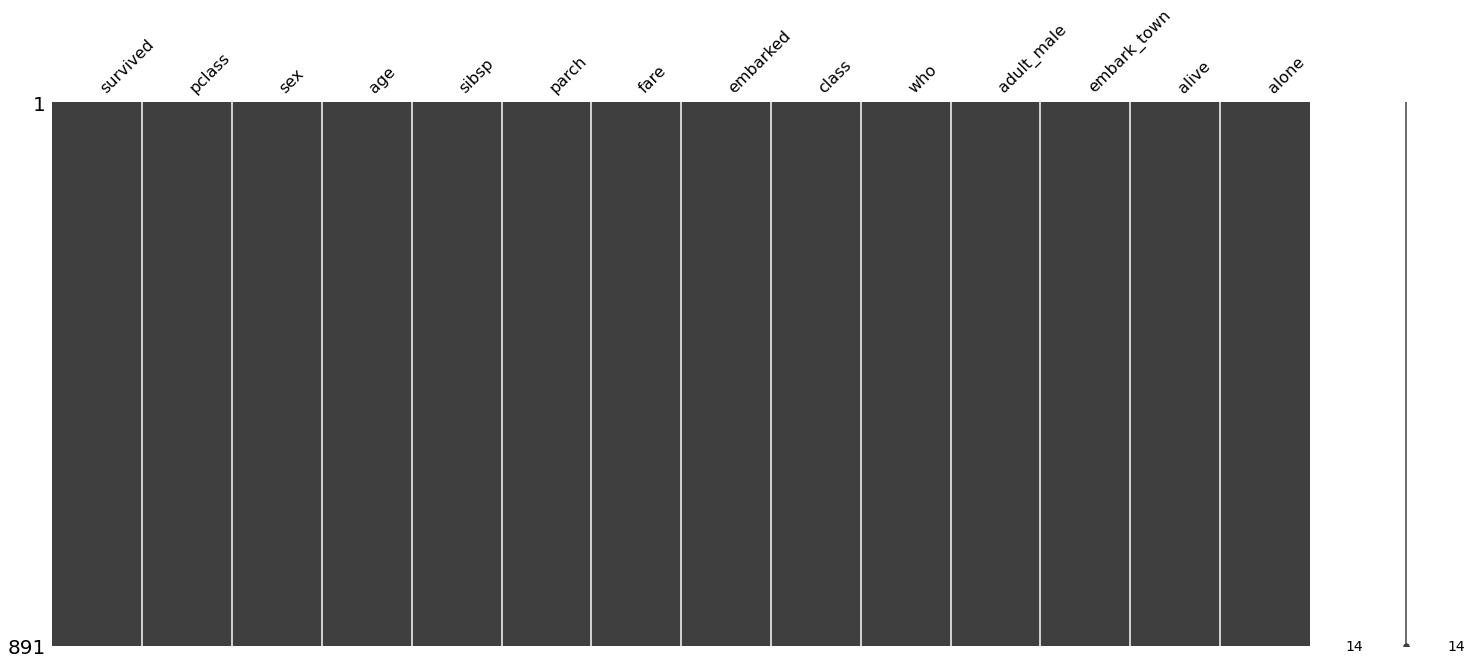

In [68]:
msno.matrix(result_df)
plt.show()

### 3. 스케일링, 변환
- StandardScaler : 평균 0, 표준편차가 1이 되도록 스케일링

- RobustScaler : 중앙값이 0이 되도록 스케일링
    - 아웃라이어가 있어도 데이터가 한쪽으로 쏠리지 않도록 보완해주는 편
- 수치가 크면 더 영향을 크게 끼칠 수 있어서 그에대한 스케일링을 적용시켜 피쳐들이 동등하게 값에 관여하도록 하는게 목적임

In [69]:
data1 = np.arange(7).reshape(-1,1)
data1

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [70]:
np.mean(data1), np.std(data1)

(3.0, 2.0)

In [71]:
# StandardScaler

In [74]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [79]:
data2 = scaler.fit_transform(data1)
data2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [80]:
np.mean(data2), np.std(data2)

(0.0, 1.0)

In [84]:
# 아웃라이어가 존재하는 데이터의 스케일링
data3 = np.vstack([data1,[[1000]]])
data3

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [85]:
data = scaler.fit_transform(data3)
data

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [87]:
# 위와같이 데이터에 혼자만 큰수(1000)가 있을땐 RobustScaler를 사용함

In [88]:
from sklearn.preprocessing import RobustScaler

In [89]:
scaler = RobustScaler()

In [91]:
data = scaler.fit_transform(data3)
data

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [92]:
np.median(data)

0.0

### 4. 범주형 데이터 처리
- 더미 변수화
    - full-rank : 모든 카테고리를 컬럼으로 설정하여 수치화
    - reduce-rank : 하나의 카테고리를 기준으로 나머지 컬럼을 수치화
- 카테고리 임베딩

In [104]:
datas = np.random.choice(["A","B","O","AB"],10)
df = pd.DataFrame({"blood":datas})
df.tail()

,blood
5,AB
6,O
7,B
8,A
9,AB


In [105]:
#full-rank // 컬럼수를 늘린다 -> blood A // blood B ... 와 같이 컬럼을 새로 만들고 그안에 해당하는 혈액형에 1로 채우고 나머지는 0으로 채움
fr_df = pd.get_dummies(df)
fr_df.tail()

,blood_A,blood_AB,blood_B,blood_O
5,0,1,0,0
6,0,0,0,1
7,0,0,1,0
8,1,0,0,0
9,0,1,0,0


In [106]:
#reduce-rank // 기준 컬럼

In [108]:
fr_df["blood_A"]=1
fr_df.tail(3)

,blood_A,blood_AB,blood_B,blood_O
7,1,0,1,0
8,1,0,0,0
9,1,1,0,0


In [109]:
#두개 이상의 범주형 변수에 대한 더미 변수화

In [110]:
datas_1 = np.random.choice(["A","B","O","AB"],100)
datas_2 = np.random.choice(["male","female"],100)
df = pd.DataFrame({"blood":datas_1, "sex":datas_2})
df.tail(3)

,blood,sex
97,A,male
98,A,female
99,AB,female


In [112]:
#통합축소형 방식 // ????

In [114]:
result_df = pd.get_dummies(df)
result_df["intercept"] = 1
result_df.tail(3)

,blood_A,blood_AB,blood_B,blood_O,sex_female,sex_male,intercept
97,1,0,0,0,0,1,1
98,1,0,0,0,1,0,1
99,0,1,0,0,1,0,1


In [116]:
#상호작용 방식
result_df = pd.get_dummies(df["blood"]+"-"+df["sex"])
result_df

,A-female,A-male,AB-female,AB-male,B-female,B-male,O-female,O-male
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,0,0,0
96,0,1,0,0,0,0,0,0
97,0,1,0,0,0,0,0,0
98,1,0,0,0,0,0,0,0


In [ ]:
# 카테고리 임베딩
# 카테고리 데이터를 대체할 수 있는 수치형 데이터로 변환
# 컬럼 : 서울, 부산, 인천 > 1000,300,200